<a href="https://colab.research.google.com/github/KruthigaKarunakaran/Deep-Learning-and-Neural-Network/blob/master/mnist_Fashion_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
train_images.shape

(60000, 28, 28)

In [18]:
len(train_labels)

60000

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
len(test_labels)

10000

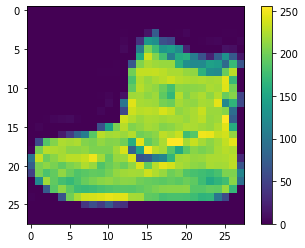

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

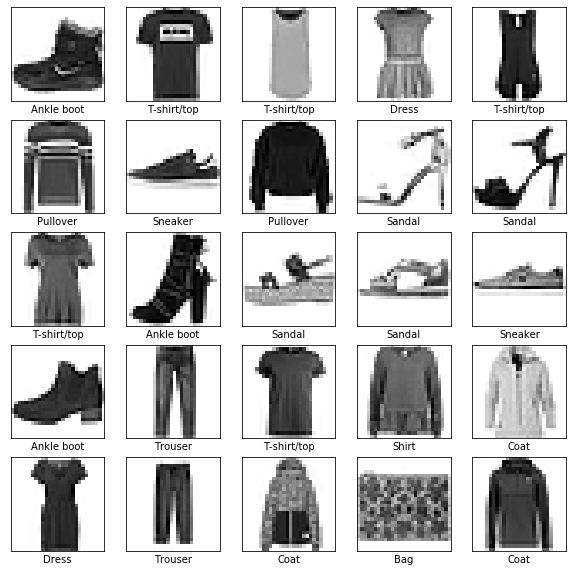

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4264 - acc: 0.8500
Epoch 2/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4201 - acc: 0.8530
Epoch 3/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4148 - acc: 0.8543
Epoch 4/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4097 - acc: 0.8559
Epoch 5/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4051 - acc: 0.8575
Epoch 6/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4007 - acc: 0.8593
Epoch 7/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3965 - acc: 0.8607
Epoch 8/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3928 - acc: 0.8615
Epoch 9/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3889 - acc: 0.8618
Epoch 10/20
60000/60000 [==============================] - 

In [0]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [34]:
predictions[0]

array([9.7186202e-08, 1.9912332e-09, 1.9399370e-06, 9.1740714e-07,
       2.1225567e-06, 1.2197997e-01, 1.0542171e-05, 9.2862844e-02,
       2.4079203e-03, 7.8273362e-01], dtype=float32)

In [35]:
np.argmax(predictions[0])

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

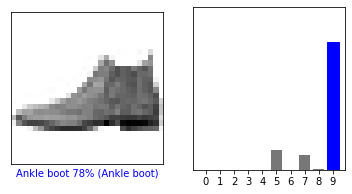

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

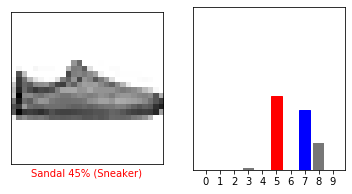

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

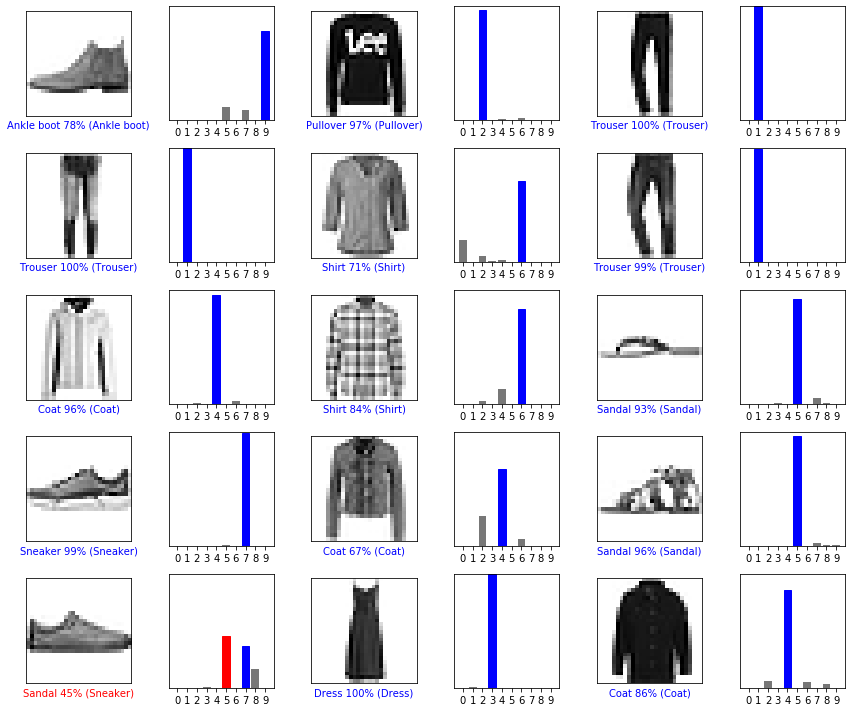

In [40]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [51]:
img = test_images[2]

print(img.shape)

(28, 28)


In [52]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)

(1, 28, 28)


(1, 28, 28)

In [53]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.4226287e-05 9.9974626e-01 2.7603888e-05 1.2460162e-04 6.7004410e-05
  6.1042238e-15 9.1306184e-08 1.1430237e-10 1.2894027e-07 2.3530232e-12]]


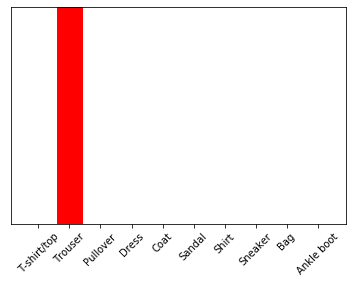

In [55]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)